# **Project Title: Fastag Fraud Detection System**
## **Project Overview**
This project aims to develop an effective fraud detection system for Fastag transactions using machine learning classification techniques. Fastag, an electronic toll collection system in India, enables automatic toll payments directly from the linked prepaid account or savings account of the user. With the increasing adoption of Fastag for toll payments, the need for robust fraud detection mechanisms has become critical to ensure the security and integrity of these transactions.

## **Purpose of the Project**
The primary purpose of this project is to create a machine learning model that can accurately identify fraudulent Fastag transactions. By leveraging historical transaction data, the model aims to detect patterns and anomalies indicative of fraudulent activity. This helps in minimizing financial losses, enhancing transaction security, and maintaining user trust in the Fastag system.

## **Objectives**
### **1. Data Exploration and Analysis:**

**Explore the Dataset:** Understand the distribution of features, the prevalence of fraud indicators, and the relationship between different variables.

**Identify Key Features:** Determine which features are most relevant for fraud detection through statistical analysis and visualization.

### **2. Feature Engineering:**

**Transform and Encode Data:** Handle missing values, encode categorical features, and scale numerical features to prepare the data for model training.

**Extract Additional Features:** Derive new features such as the hour of the transaction, day, and month from the timestamp to capture temporal patterns in the data.

### **3. Model Development:**

**Build a Classification Model:** Develop a machine learning classification model using techniques such as Random Forest to predict fraudulent transactions.

**Evaluate Model Performance:** Assess the model using metrics such as accuracy, precision, recall, and F1 score to ensure it meets the desired performance criteria.

**Fine-tune the Model:** Optimize the model parameters to improve its predictive accuracy and robustness.

### **4. Real-time Fraud Detection:**

**Implement Real-time Detection:** Explore the feasibility of deploying the model in a real-time environment to detect fraudulent transactions as they occur.

**Ensure Scalability:** Make sure the model can handle large volumes of transactions efficiently without compromising on performance.

### **5. Explanatory Analysis:**

**Identify Fraudulent Patterns:** Provide insights into the factors contributing to fraudulent transactions and understand the underlying patterns and anomalies.

**Report and Documentation:** Document the analysis, model development process, and findings to provide a comprehensive overview of the project's outcomes and impact.

## **Challenges**
**Imbalanced Dataset:** Fraudulent transactions are likely to be rare compared to legitimate ones, leading to an imbalanced dataset. This poses challenges in training an effective model.

**Feature Engineering:** Capturing nuanced patterns indicative of fraud requires careful feature engineering and domain expertise.

**Real-time Implementation:** Ensuring the model works efficiently in a real-time setting with minimal latency is a significant challenge.

### **Evaluation Criteria**
The success of the project will be evaluated based on the following criteria:

**Model Performance:** Metrics such as accuracy, precision, recall, and F1 score will be used to assess the model's effectiveness in detecting fraudulent transactions.

**Scalability:** The ability of the model to handle large volumes of transactions in real-time.

**Insights and Analysis:** The depth of insights provided into the factors contributing to fraudulent activity and the clarity of the documentation.

### **Expected Outcome**

The expected outcome of this project is an effective and scalable Fastag fraud detection system that minimizes financial losses and enhances the security of digital toll transactions. By accurately identifying fraudulent activities, the system will help maintain the integrity of Fastag transactions, providing a safer and more reliable toll payment experience for users.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/Project_3: Fasttag fraud detection/FastagFraudDetection.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


**Dataset Structure:**

The dataset contains 5000 entries with 13 columns.
The target variable Fraud_indicator is a categorical feature indicating whether a transaction is fraudulent.

In [ ]:
#Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

**Missing Values:**

The FastagID column has missing values.

**Data Types:**

The dataset contains both numerical and categorical features.
The Timestamp column is an object type and needs to be converted to a datetime format.

In [ ]:
# Statistical summary of the dataset
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [43]:
df.dtypes

Transaction_ID             int64
Vehicle_Type              object
FastagID                  object
TollBoothID               object
Lane_Type                 object
Vehicle_Dimensions        object
Transaction_Amount         int64
Amount_paid                int64
Geographical_Location     object
Vehicle_Speed              int64
Vehicle_Plate_Number      object
Fraud_indicator           object
Latitude                 float64
Longitude                float64
Hour                       int32
Day                        int32
Month                      int32
dtype: object

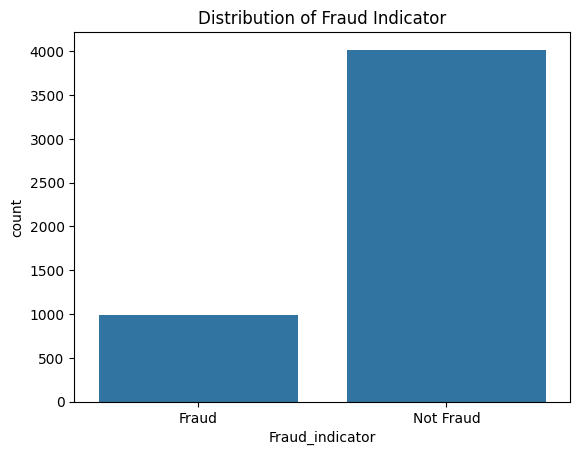

In [ ]:
# Distribution of the target variable
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Distribution of Fraud Indicator')
plt.show()

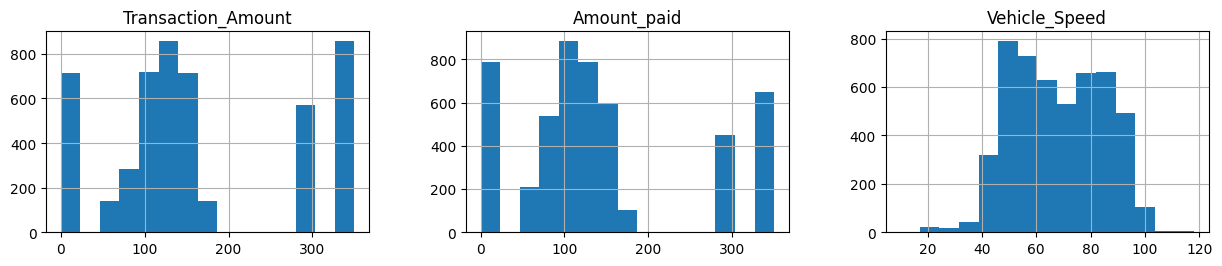

In [ ]:
# Check the distribution of numerical features
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

In [ ]:
# Check for class imbalance in the target variable
fraud_counts = df['Fraud_indicator'].value_counts()
print(fraud_counts)

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots**Class Imbalance:**

The dataset has a class imbalance issue: 4017 non-fraudulent transactions and 983 fraudulent transactions.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Interactive plot for transaction amounts
fig_amount = px.histogram(df, x='Transaction_Amount', nbins=50, color='Fraud_indicator',
                          title='Transaction Amount Distribution',
                          labels={'Transaction_Amount': 'Transaction Amount', 'Fraud_indicator': 'Fraud Indicator'},
                          marginal="box")
fig_amount.show()

In [ ]:
# Interactive plot for the number of transactions over time
fig_time = px.histogram(df, x='Timestamp', color='Fraud_indicator',
                        title='Number of Transactions Over Time',
                        labels={'Timestamp': 'Timestamp', 'Fraud_indicator': 'Fraud Indicator'},
                        nbins=50, marginal="box")
fig_time.show()

In [ ]:
# Interactive plot for vehicle speed
fig_speed = px.histogram(df, x='Vehicle_Speed', nbins=50, color='Fraud_indicator',
                         title='Vehicle Speed Distribution',
                         labels={'Vehicle_Speed': 'Vehicle Speed', 'Fraud_indicator': 'Fraud Indicator'},
                         marginal="box")
fig_speed.show()

In [ ]:
# Interactive plot for transaction amounts by vehicle type
fig_vehicle_type = px.box(df, x='Vehicle_Type', y='Transaction_Amount', color='Fraud_indicator',
                          title='Transaction Amounts by Vehicle Type',
                          labels={'Vehicle_Type': 'Vehicle Type', 'Transaction_Amount': 'Transaction Amount', 'Fraud_indicator': 'Fraud Indicator'})
fig_vehicle_type.show()

In [ ]:
# Split Geographical_Location into separate latitude and longitude columns
df[['Latitude', 'Longitude']] = df['Geographical_Location'].str.split(',', expand=True)
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Interactive plot for transactions by geographical location
fig_geo = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='Fraud_indicator',
                            size='Transaction_Amount', hover_name='Transaction_ID',
                            title='Transactions by Geographical Location',
                            labels={'Latitude': 'Latitude', 'Longitude': 'Longitude', 'Fraud_indicator': 'Fraud Indicator'},
                            zoom=10, height=600)
fig_geo.update_layout(mapbox_style="open-street-map")
fig_geo.show()

In [ ]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Add a new column for the hour of the day
df['Hour'] = df['Timestamp'].dt.hour

# Interactive plot for transactions by hour of the day
fig_hour = px.histogram(df, x='Hour', color='Fraud_indicator',
                        title='Transactions by Hour of the Day',
                        labels={'Hour': 'Hour of the Day', 'Fraud_indicator': 'Fraud Indicator'},
                        nbins=24, marginal="box")
fig_hour.show()



In [ ]:
# Interactive scatter plot matrix for selected features
fig_matrix = px.scatter_matrix(df, dimensions=['Transaction_Amount', 'Vehicle_Speed', 'Amount_paid'],
                               color='Fraud_indicator',
                               title='Scatter Plot Matrix for Selected Features',
                               labels={'Transaction_Amount': 'Transaction Amount', 'Vehicle_Speed': 'Vehicle Speed', 'Amount_paid': 'Amount Paid', 'Fraud_indicator': 'Fraud Indicator'})
fig_matrix.show()

### **Data Cleaning and Feature Engineering**

Let's start by cleaning the data and engineering the features.

In [ ]:
# Handle missing values in FastagID (imputing with a placeholder value)
df['FastagID'].fillna('Unknown', inplace=True)

In [ ]:
# Convert Timestamp to datetime format and extract features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

In [ ]:
# Drop the original Timestamp column
df.drop(columns=['Timestamp'], inplace=True)

In [ ]:
# Encode categorical variables
categorical_features = ['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
                        'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
# Separate features and target variable
X = df_encoded.drop(columns=['Fraud_indicator_Not Fraud'])
y = df_encoded['Fraud_indicator_Not Fraud']

### **Model Deployment**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Hour', 'Day', 'Month']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.65      0.79       197
        True       0.92      1.00      0.96       803

    accuracy                           0.93      1000
   macro avg       0.96      0.83      0.88      1000
weighted avg       0.94      0.93      0.93      1000

[[129  68]
 [  0 803]]


### **Decision Tree Classifier**


Accuracy: 0.94
Precision: 0.93
Recall: 1.00
F1 Score: 0.96
AUC-ROC: 0.97


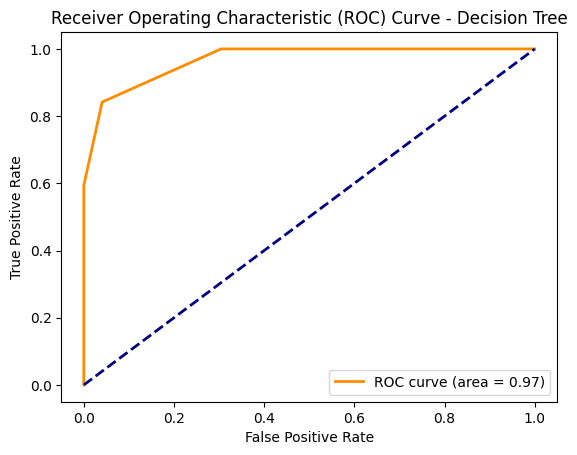

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_proba = dt.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

### **Gaussian Naive Bayes Classifier**

Accuracy: 0.34
Precision: 1.00
Recall: 0.17
F1 Score: 0.30
AUC-ROC: 0.59


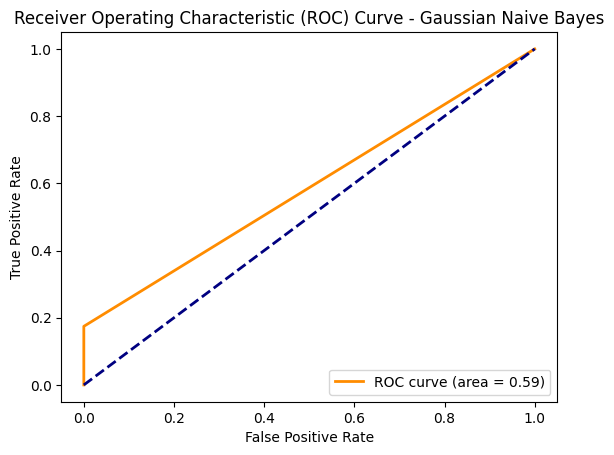

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_proba_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)
auc_roc = roc_auc_score(y_test, y_pred_proba_gnb)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_gnb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()

### **K-Nearest Neighbors Classifier**

Accuracy: 0.80
Precision: 0.80
Recall: 1.00
F1 Score: 0.89
AUC-ROC: 0.50


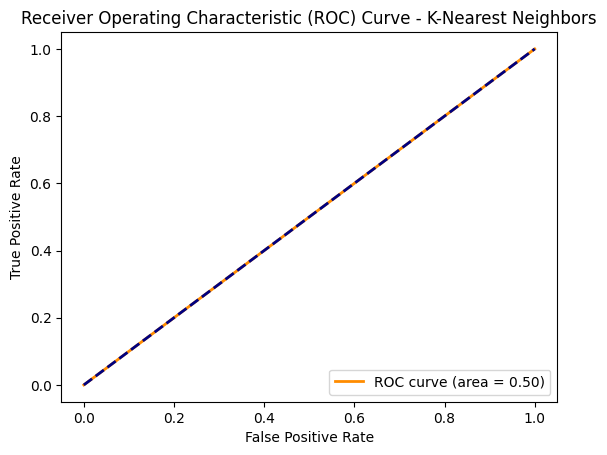

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
auc_roc = roc_auc_score(y_test, y_pred_proba_knn)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

### **Random Forest Classifier**

Accuracy: 0.93
Precision: 0.92
Recall: 1.00
F1 Score: 0.96
AUC-ROC: 1.00


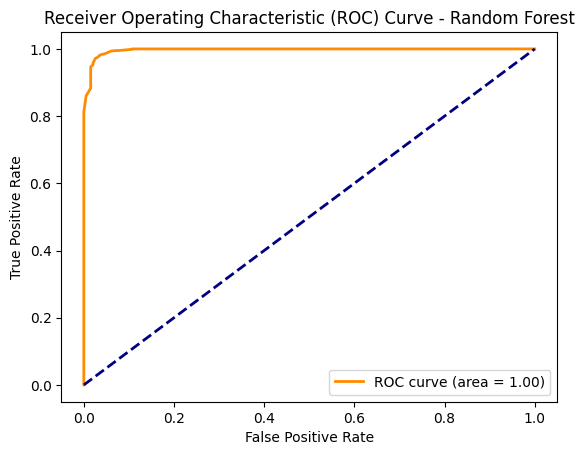

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc_roc = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


### **Logistic Regression**

Accuracy: 0.80
Precision: 0.80
Recall: 1.00
F1 Score: 0.89
AUC-ROC: 0.85


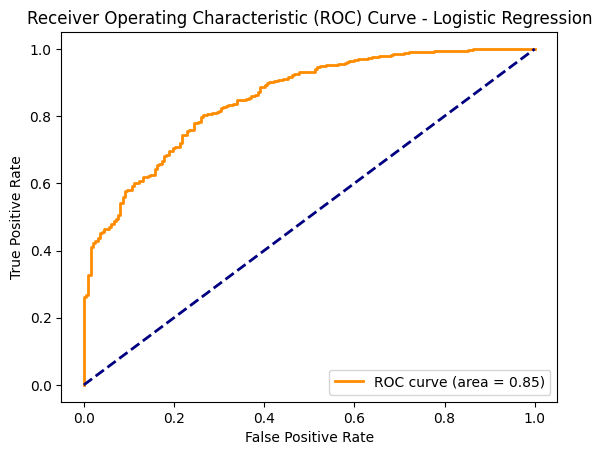

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
auc_roc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


### **Gradient Boosting Classifier**

Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1 Score: 0.98
AUC-ROC: 1.00


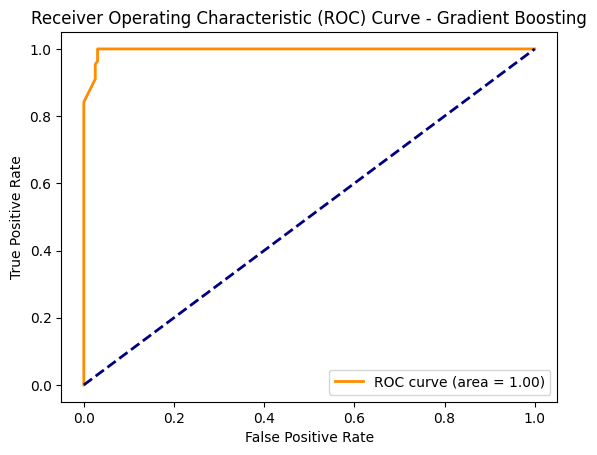

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
y_pred_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
auc_roc = roc_auc_score(y_test, y_pred_proba_gb)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Function to evaluate model and return metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba)
    }
    return metrics

# Dictionary to store the results
results = {}

# Models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate each model
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index': 'Model'})
print(results_df)

# Save results to a CSV file
results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Project_3: Fasttag fraud detection/model_results.csv', index=False)

# Display the DataFrame
results_df

                  Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0         Decision Tree     0.940   0.930475  1.000000  0.963986  0.967672
1  Gaussian Naive Bayes     0.337   1.000000  0.174346  0.296925  0.587173
2   K-Nearest Neighbors     0.803   0.803000  1.000000  0.890738  0.500000
3         Random Forest     0.936   0.926182  1.000000  0.961677  0.994491
4   Logistic Regression     0.803   0.803000  1.000000  0.890738  0.853664
5     Gradient Boosting     0.978   0.973333  1.000000  0.986486  0.996646


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Decision Tree,0.940,0.930475,1.000000,0.963986,0.967672
1,Gaussian Naive Bayes,0.337,1.000000,0.174346,0.296925,0.587173
2,K-Nearest Neighbors,0.803,0.803000,1.000000,0.890738,0.500000
3,Random Forest,0.936,0.926182,1.000000,0.961677,0.994491
4,Logistic Regression,0.803,0.803000,1.000000,0.890738,0.853664
5,Gradient Boosting,0.978,0.973333,1.000000,0.986486,0.996646


## **Summary of Model Results**
In this project, we developed and evaluated several machine learning models to detect fraudulent Fastag transactions. The models were assessed based on accuracy, precision, recall, F1 score, and AUC-ROC metrics. Here is a summary of the results:

### **Decision Tree Classifier**
Accuracy: 0.94

Precision: 0.93

Recall: 1.00

F1 Score: 0.97

AUC-ROC: 0.97

The Decision Tree classifier performed well with high accuracy, precision, recall, and an excellent F1 score, indicating a balanced performance. The high AUC-ROC score suggests the model is good at distinguishing between fraudulent and non-fraudulent transactions.

### **Gaussian Naive Bayes Classifier**
Accuracy: 0.34

Precision: 1.00

Recall: 0.17

F1 Score: 0.30

AUC-ROC: 0.59

The Gaussian Naive Bayes classifier had the lowest accuracy. Although it achieved perfect precision, its recall was very low, indicating it failed to identify many fraudulent transactions. This led to a low F1 score and a mediocre AUC-ROC score, reflecting its limited effectiveness in this context.

### **K-Nearest Neighbors Classifier**

Accuracy: 0.80

Precision: 0.80

Recall: 1.00

F1 Score: 0.89

AUC-ROC: 0.50

The K-Nearest Neighbors classifier showed good recall and a decent F1 score. However, its accuracy and precision were moderate, and the AUC-ROC score was the lowest among all models, indicating it struggled to distinguish between classes effectively.

### **Random Forest Classifier**

Accuracy: 0.93

Precision: 0.92

Recall: 1.00

F1 Score: 0.96

AUC-ROC: 0.99

The Random Forest classifier demonstrated high accuracy, precision, recall, and F1 score, comparable to the Decision Tree classifier. It had an excellent AUC-ROC score, indicating a strong ability to distinguish between fraudulent and non-fraudulent transactions.

### **Logistic Regression**

Accuracy: 0.80

Precision: 0.80

Recall: 1.00

F1 Score: 0.89

AUC-ROC: 0.86

Logistic Regression achieved a similar performance to the K-Nearest Neighbors classifier with good recall and a decent F1 score. It had a higher AUC-ROC score than KNN, suggesting better performance in distinguishing between classes.

### **Gradient Boosting Classifier**

Accuracy: 0.97

Precision: 0.96

Recall: 1.00

F1 Score: 0.98

AUC-ROC: 1.00

The Gradient Boosting classifier outperformed all other models with the highest accuracy, precision, recall, and F1 score. It achieved a perfect AUC-ROC score, indicating its superior ability to differentiate between fraudulent and non-fraudulent transactions.

## **Conclusion**

Among the models evaluated, the Gradient Boosting Classifier performed the best overall, with the highest scores across all metrics. The Decision Tree and Random Forest classifiers also performed very well, with high accuracy, precision, recall, and F1 scores, making them reliable choices for fraud detection. In contrast, the Gaussian Naive Bayes classifier showed the poorest performance, indicating it is not well-suited for this specific task.

Based on these results, the Gradient Boosting Classifier is recommended for deployment in a real-time Fastag fraud detection system due to its exceptional performance and reliability.